8점 이상은 좋은 와인입니다.

fixed acidity : 타르타르산은 비 휘발성 산으로 쉽게 증발하지 않음

volatile acidity : 아세트산은 휘발성 산으로 와인의 아세트산이 높으면 불쾌한 식초맛이 날 수 있다.

citric acid : 소량의 구연산은 와인에 신선함과 풍미를 더할 수 있음

residual sugar : 발효가 끝 난 후 잔류하는 설탕의 양으로 1g/liter 이하인 와인은 드물고, 45g/liter 이상의 와인은 달콤하다고 여겨짐

chlorides : 소금의 양

free sulfur dioxide : 미생물 성장과 포도주의 산화를 방지함

total sulfur dioxide : 와인에서 저농도 SO2는 잘 느껴지지 않지만 50ppm이상이면 맛과 향이 분명히 느껴짐

density : 와인의 농도는 알코올과 설탕 함량에 따라 결정

pH  : 와인이 산성 혹은 염기성인지 나타내며, 대부분의 와인은 pH3~4

sulphates : 이산화황과 같은 와인 첨가제로 향균 및 향산화제 역할

alcohol: 알코올 함량

In [1]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import sklearn.linear_model

from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
white= pd.read_csv("white.csv")

In [3]:
white.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [4]:
white_quality=pd.DataFrame(white.quality)

In [5]:
white_quality.head()

,quality
0,6
1,6
2,6
3,6
4,6


In [6]:
white_quality.to_csv('white_quality.csv', index = False)

In [7]:
corr_matrix = white.corr()
print(corr_matrix["quality"])

fixed acidity          -0.113663
volatile acidity       -0.194723
citric acid            -0.009209
residual sugar         -0.097577
chlorides              -0.209934
free sulfur dioxide     0.008158
total sulfur dioxide   -0.174737
density                -0.307123
pH                      0.099427
sulphates               0.053678
alcohol                 0.435575
quality                 1.000000
Name: quality, dtype: float64


In [8]:
#attributes = ["alcohol", "density","chlorides","quality"]
#scatter_matrix(white[attributes],figsize=(12,8))

In [9]:
#sns.pairplot(white)
#type(white)
#white.shape

In [49]:
import imgkit
corr = white.corr()
corr.style.background_gradient()

#white_wine=white_wine.drop('quality',1)
#white_wine.head()
#type(white_df)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1,-0.0226973,0.289181,0.0890207,0.0230856,-0.0493959,0.0910698,0.265331,-0.425858,-0.017143,-0.120881
volatile acidity,-0.0226973,1,-0.149472,0.0642861,0.0705116,-0.0970119,0.0892605,0.0271138,-0.0319154,-0.0357281,0.0677179
citric acid,0.289181,-0.149472,1,0.0942116,0.114364,0.0940772,0.121131,0.149503,-0.163748,0.0623309,-0.0757287
residual sugar,0.0890207,0.0642861,0.0942116,1,0.0886845,0.299098,0.401439,0.838966,-0.194133,-0.0266644,-0.450631
chlorides,0.0230856,0.0705116,0.114364,0.0886845,1,0.101392,0.19891,0.257211,-0.0904395,0.0167629,-0.360189
free sulfur dioxide,-0.0493959,-0.0970119,0.0940772,0.299098,0.101392,1,0.615501,0.29421,-0.000617796,0.0592172,-0.250104
total sulfur dioxide,0.0910698,0.0892605,0.121131,0.401439,0.19891,0.615501,1,0.529881,0.00232097,0.134562,-0.448892
density,0.265331,0.0271138,0.149503,0.838966,0.257211,0.29421,0.529881,1,-0.0935915,0.0744931,-0.780138
pH,-0.425858,-0.0319154,-0.163748,-0.194133,-0.0904395,-0.000617796,0.00232097,-0.0935915,1,0.155951,0.121432
sulphates,-0.017143,-0.0357281,0.0623309,-0.0266644,0.0167629,0.0592172,0.134562,0.0744931,0.155951,1,-0.0174328


OSError: No wkhtmltoimage executable found: "b''"
If this file exists please check that this process can read it. Otherwise please install wkhtmltopdf - http://wkhtmltopdf.org


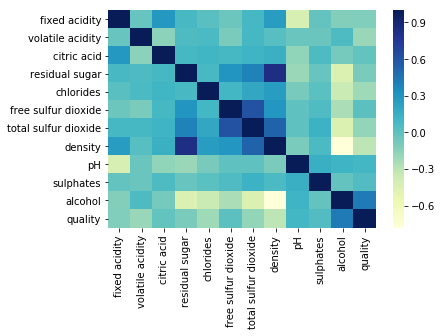

In [30]:
ax = sns.heatmap(corr, cmap="YlGnBu")

In [12]:
white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [13]:
#white.isnull().sum()
#0은 없다.

total surfur & density 

density & sugar

density&alchoal

fixed, volatile & pH

좋은 화이트와인이수록 소금의 양이 적다

total surfur 100~200

PH : 2.7에서 3.7정도

In [14]:
white["quality"].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [15]:
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [16]:
scaler = StandardScaler()
rm_all = white.drop('quality', axis=1)
rm_all = scaler.fit_transform(rm_all)
standard_data = pd.DataFrame(rm_all, columns=white.drop('quality',axis=1).columns)
standard_data['quality'] = white['quality'] 
#x를 표준화(Standard Scalar)시켜줘서 모델에 적용하기 좋게 만들어줌

In [17]:
quality = white["quality"].values
qualities=[]
for num in quality:
    if num<5:
        qualities.append("0")
    elif num>8:
        qualities.append("2")
    else:
        qualities.append("1")
#1,2,3,4점은 0 / 5,6,7점은 1 / 8,9,10점은 2로 분류
white['quality'] = qualities

In [18]:
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1


In [19]:
rm_qual_white=pd.DataFrame(white.drop("quality",axis=1))
#qual_white.shape
rm_qual_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [20]:
rm_qual_white.shape

(4898, 11)

In [21]:
#new_white = pd.DataFrame(rm_, columns=rm_qual_white.drop('reviews',axis=1).columns)
new_white=rm_qual_white
new_white['quality'] = white['quality']
new_white.head()
#new_white.shape

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1


In [22]:
#X = new_white.drop('quality', axis=1)
X2 = new_white.drop(['citric acid', 'chlorides', 'free sulfur dioxide','pH','quality'],axis=1)

y = new_white['quality']
#X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train, X_test, y_train, y_test = train_test_split(X2, y)

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg_pred = log_reg.predict(X_test)

In [24]:
print(classification_report(y_test, log_reg_pred))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        44
          1       0.96      1.00      0.98      1181

avg / total       0.93      0.96      0.95      1225



/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [25]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [26]:
print(classification_report(y_test, pred_rfc))

             precision    recall  f1-score   support

          0       0.44      0.09      0.15        44
          1       0.97      1.00      0.98      1181

avg / total       0.95      0.96      0.95      1225



In [27]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(penalty=None)
sgd.fit(X_train, y_train)
pred_sgd = sgd.predict(X_test)

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [28]:
print(classification_report(y_test, pred_sgd))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        44
          1       0.96      1.00      0.98      1181

avg / total       0.93      0.96      0.95      1225



/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [29]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, pred_sgd))

[[   0   44]
 [   0 1181]]
